In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
# data = pd.read_csv(".csv")
# data.head()

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
data=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/iot-dataset/device_3_dataset.csv')

In [4]:
data.head()

,MI_dir_L5_weight,MI_dir_L5_mean,MI_dir_L5_variance,MI_dir_L3_weight,MI_dir_L3_mean,MI_dir_L3_variance,MI_dir_L1_weight,MI_dir_L1_mean,MI_dir_L1_variance,MI_dir_L0.1_weight,...,HpHp_L0.1_covariance,HpHp_L0.1_pcc,HpHp_L0.01_weight,HpHp_L0.01_mean,HpHp_L0.01_std,HpHp_L0.01_magnitude,HpHp_L0.01_radius,HpHp_L0.01_covariance,HpHp_L0.01_pcc,type
0,1.000000,60.000000,0.00000,1.000000,60.000000,0.000000e+00,1.000000,60.000000,0.000000e+00,1.000000,...,0.0,0.0,1.000000,60.000000,0.000000e+00,60.000000,0.000000e+00,0.0,0.0,benign
1,1.000000,70.000000,0.00000,1.000000,70.000000,0.000000e+00,1.000000,70.000000,0.000000e+00,1.000000,...,0.0,0.0,1.000000,70.000000,0.000000e+00,70.000000,0.000000e+00,0.0,0.0,benign
2,1.000023,89.999548,0.00904,1.001631,89.967432,6.503024e-01,1.117713,87.893685,3.768974e+01,1.807388,...,0.0,0.0,1.000000,90.000000,0.000000e+00,90.000000,0.000000e+00,0.0,0.0,benign
3,1.000000,60.000000,0.00000,1.000000,60.000000,4.550000e-13,1.000091,60.000000,4.550000e-13,1.394277,...,0.0,0.0,1.911130,60.000000,9.540000e-07,60.000000,9.090000e-13,0.0,0.0,benign
4,1.000000,590.000000,0.00000,1.000000,590.000000,0.000000e+00,1.000000,590.000000,0.000000e+00,1.000000,...,0.0,0.0,4.274029,399.892026,1.050783e+02,399.892026,1.104145e+04,0.0,0.0,benign


In [6]:
data.groupby('type')['type'].count()

type
benign           39100
gafgyt_combo     53014
gafgyt_junk      29797
gafgyt_scan      28120
gafgyt_tcp      101536
gafgyt_udp      103933
Name: type, dtype: int64

In [7]:
data.drop(data[data["type"] == "gafgyt_udp"].index, inplace = True)
data.drop(data[data["type"] == "gafgyt_tcp"].index, inplace = True)

In [8]:
data.groupby('type')['type'].count()

type
benign          39100
gafgyt_combo    53014
gafgyt_junk     29797
gafgyt_scan     28120
Name: type, dtype: int64

In [9]:
x = data.iloc[:,:-1].values
y = data.iloc[:,-1].values

In [10]:
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(random_state=0)
x, y = rus.fit_resample(x, y)


In [11]:
from collections import Counter
print(sorted(Counter(y).items()))

[('benign', 28120), ('gafgyt_combo', 28120), ('gafgyt_junk', 28120), ('gafgyt_scan', 28120)]


In [ ]:
#standardize numerical columns
# def standardize(df,col):
#     df[col]= (df[col]-df[col].mean())/df[col].std()
# data_st=data.copy()
# for i in (data_st.iloc[:,:-1].columns):
#     standardize (data_st,i)
# data_st.head()

In [12]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
y = labelencoder.fit_transform(y)

In [13]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
x = sc.fit_transform(x)

In [14]:
x = x.reshape(x.shape[0], x.shape[1], 1)
print(x.shape)

(112480, 115, 1)


In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2,shuffle=True)

In [16]:
from keras import Sequential
from keras.layers import Dense, Conv1D, Flatten, MaxPooling1D

model = Sequential()
model.add(Conv1D(64, 2, activation="relu", batch_input_shape=(None, 115, 1)))
model.add(Dense(16, activation="relu"))
model.add(MaxPooling1D())
model.add(Flatten())
model.add(Dense(4, activation = 'softmax'))
model.compile(loss = 'sparse_categorical_crossentropy', 
     optimizer = "adam",               
              metrics = ['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 114, 64)           192       
                                                                 
 dense (Dense)               (None, 114, 16)           1040      
                                                                 
 max_pooling1d (MaxPooling1D  (None, 57, 16)           0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 912)               0         
                                                                 
 dense_1 (Dense)             (None, 4)                 3652      
                                                                 
Total params: 4,884
Trainable params: 4,884
Non-trainable params: 0
______________________________________________________

In [17]:
#Fitting the data to the training dataset
history = model.fit(X_train,y_train, validation_data=(X_test,y_test), epochs=10)

Epoch 1/10
2812/2812 [==============================] - 11s 4ms/step - loss: 0.1796 - accuracy: 0.9285 - val_loss: 0.0746 - val_accuracy: 0.9717
Epoch 2/10
2812/2812 [==============================] - 10s 4ms/step - loss: 0.0567 - accuracy: 0.9796 - val_loss: 0.0412 - val_accuracy: 0.9859
Epoch 3/10
2812/2812 [==============================] - 13s 5ms/step - loss: 0.0393 - accuracy: 0.9873 - val_loss: 0.0297 - val_accuracy: 0.9920
Epoch 4/10
2812/2812 [==============================] - 16s 6ms/step - loss: 0.0291 - accuracy: 0.9899 - val_loss: 0.0252 - val_accuracy: 0.9903
Epoch 5/10
2812/2812 [==============================] - 15s 5ms/step - loss: 0.0263 - accuracy: 0.9912 - val_loss: 0.0194 - val_accuracy: 0.9941
Epoch 6/10
2812/2812 [==============================] - 12s 4ms/step - loss: 0.0222 - accuracy: 0.9918 - val_loss: 0.0177 - val_accuracy: 0.9969
Epoch 7/10
2812/2812 [==============================] - 10s 4ms/step - loss: 0.0186 - accuracy: 0.9930 - val_loss: 0.0142 - val_ac

In [18]:
y_pred=model.predict(X_test)
y_pred = y_pred.argmax(axis=-1)

# **ploting and results**

In [19]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, matthews_corrcoef, f1_score, precision_score, recall_score

print(f"Accuracy   : {accuracy_score(y_test, y_pred)}")
# print(f"Precision  : {precision_score(y_test, y_pred)}")
# print(f"F1-Measure : {f1_score(y_test, y_pred)}")
print(f"MCC        : {matthews_corrcoef(y_test, y_pred)}")
# print(f"Recall     : {recall_score(y_test, y_pred)}")

Accuracy   : 0.9977773826458037
MCC        : 0.9970426026956594


In [20]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5590
           1       1.00      0.99      1.00      5534
           2       0.99      1.00      1.00      5718
           3       1.00      1.00      1.00      5654

    accuracy                           1.00     22496
   macro avg       1.00      1.00      1.00     22496
weighted avg       1.00      1.00      1.00     22496



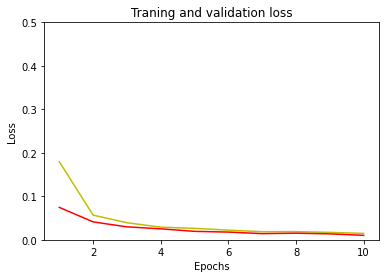

In [21]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1,len(loss) + 1)
plt.plot(epochs,loss,'y',label='Tranning loss')
plt.plot(epochs,val_loss,'r',label='Validation loss')
plt.title('Traning and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.ylim([0, 0.5])
plt.show()

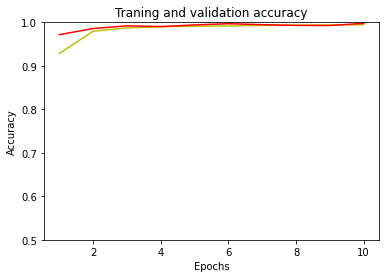

In [22]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, acc, 'y', label='Training accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation accuracy')
plt.title('Traning and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.show()

[[5590    0    0    0]
 [   0 5485   49    0]
 [   0    0 5718    0]
 [   1    0    0 5653]]


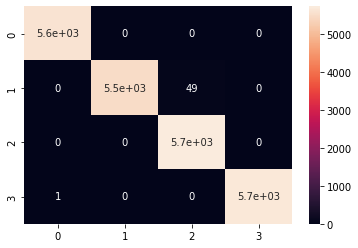

In [23]:
#Confusion matrix 
import seaborn as sns
cm = confusion_matrix(y_test, y_pred)
print(cm)
sns.heatmap(cm, annot=True)